Problem Statement:

The goal is to predict the quality of wine based on various chemical features such as alcohol content, sulphates, citric acid, and others.

Steps:

Dataset: We will use the Wine Quality dataset from the UCI Machine Learning Repository.

Model: We will build a neural network regression model to predict wine quality.
Evaluation: We will evaluate the model and plot:

Actual vs. Predicted values.
Residuals (Prediction Errors).
We will also show single prediction and batch prediction examples.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers


In [4]:
# Load the wine quality dataset
url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/refs/heads/master/winequality-red.csv'
dataset = pd.read_csv(url, sep=',')

In [5]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Features (X) and target (y)
X = dataset.drop('quality', axis=1)
y = dataset['quality']

In [7]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train.shape

(1279, 11)

In [11]:
# Build a simple neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer (predicting wine quality)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 28.1684 - mae: 5.2113 - val_loss: 15.3210 - val_mae: 3.7686
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11.2854 - mae: 3.1327 - val_loss: 3.8770 - val_mae: 1.6232
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5557 - mae: 1.5095 - val_loss: 2.6938 - val_mae: 1.2849
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6536 - mae: 1.2801 - val_loss: 2.3558 - val_mae: 1.2111
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2569 - mae: 1.1621 - val_loss: 2.1436 - val_mae: 1.1559
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0683 - mae: 1.0950 - val_loss: 1.9727 - val_mae: 1.1087
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9148 - mae: 1.0685 - val_loss: 1.8157 - val_mae: 1.0669
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5497 - mae: 0.9660 - val_loss: 1.6778 - val_mae: 1.0230
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5621 - m

In [14]:
# Evaluate the model on test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4140 - mae: 0.4991 
Test MAE: 0.5041182041168213


In [15]:
# Single prediction
single_sample = X_test[0].reshape(1, -1)  # Reshape for a single prediction
single_prediction = model.predict(single_sample)
print(f"Predicted wine quality for the first sample: {single_prediction[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted wine quality for the first sample: 5.547267913818359


In [20]:
y_test.iloc[0]

6

In [21]:
single_prediction

array([[5.547268]], dtype=float32)

In [22]:
# Batch prediction (first 10 samples)
batch_predictions = model.predict(X_test[:10])
print("Predicted wine quality for the first 10 samples:")
print(batch_predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted wine quality for the first 10 samples:
[[5.547269 ]
 [5.1691756]
 [5.697081 ]
 [5.329163 ]
 [5.9093947]
 [5.257298 ]
 [5.2646823]
 [4.9592013]
 [6.0664077]
 [5.8336835]]


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


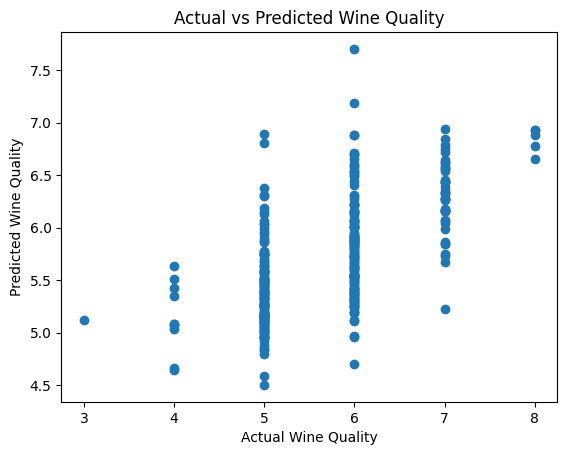

In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Wine Quality")
plt.ylabel("Predicted Wine Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.show()


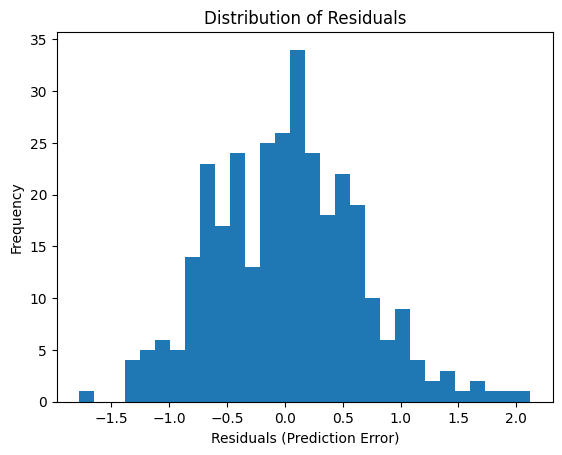

In [24]:
# Calculate residuals
residuals = y_pred.flatten() - y_test

# Plot residuals
plt.hist(residuals, bins=30)
plt.xlabel("Residuals (Prediction Error)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

In [ ]:
Summary of Steps:
Data Loading and Preprocessing: We loaded and standardized the wine dataset.
Model Building: A simple neural network model was built to predict wine quality.
Evaluation: We evaluated the model on test data and checked the Mean Absolute Error (MAE).
Predictions: We demonstrated how to make both single and batch predictions.
Visualizations: We plotted Actual vs Predicted values and Residuals.
Key Takeaways:
Single Prediction: You can use the model to predict the output for a single instance, which is useful when you want to make predictions one at a time.
Batch Prediction: You can use the model to predict outputs for multiple instances simultaneously, which is more efficient when dealing with large datasets.
Residual Analysis: This technique helps you understand how well the model is performing by looking at the errors in predictions.
You can explore more advanced techniques like cross-validation, hyperparameter tuning, or model optimization to improve the performance further.